<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/11_math_II/blob/main/2_linear_algebra/2_class_norm_vector/2_class_vector_norm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

### [Video de apoyo a la lectura interactiva y experimental de este cuaderno](https://www.youtube.com/watch?v=M9N7-2fFH1E)

### Modelo pedagógico que sustenta esta secuencia de enseñanza

[Aula invertida](https://udeaeduco-my.sharepoint.com/:b:/g/personal/marco_canas_udea_edu_co/EelvUuuDvaVAmJUCFE-XNicB_MPrWZfrqbpx7USTUovKUQ?e=t702fu)

#### Actividades del docente

1. Diseña y planifica el proceso de enseñanza-aprendizaje del aula, integrando estrategias, modelos de enseñanza y metodologías (aprendizaje basado en proyectos, aprendizaje cooperativo y colaborativo,...).
2. Diseña y planea actividades que se realizarán fuera del aula
(ver vídeos, cumplimentar cuestionarios,...).
3. Selecciona e integra la tecnología en actividades de aprendizaje activo.
4. Diseña actividades de evaluación que promuevan el aprendizaje del alumnado


## Objetivos de aprendizaje

* Definir el concepto de norma de un vector.
* Crear vectores y representarlos gráficamente.
* normalizar vectores y representar gráficamente este proceso. 

# Los vectores como flechas

Los vectores también se pueden representar como flechas. Vamos a crear una pequeña función de conveniencia para dibujar bonitas flechas:

In [29]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

Ahora dibujemos los vectores **u** y **v** como flechas:

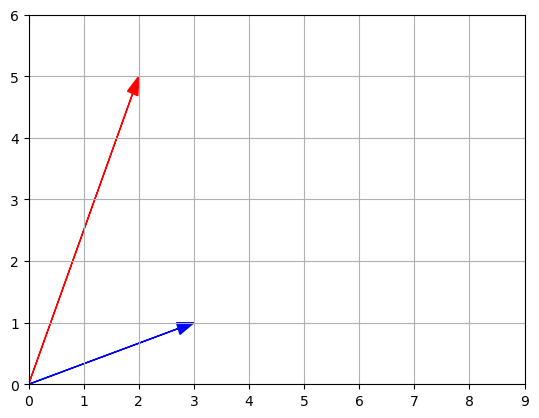

In [21]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

### Vectores 3D
Trazar vectores 3D también es relativamente sencillo. Primero, creemos dos vectores 3D:

In [1]:
import numpy as np 
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

Ahora vamos a trazarlos usando `Axes3D de matplotlib`:

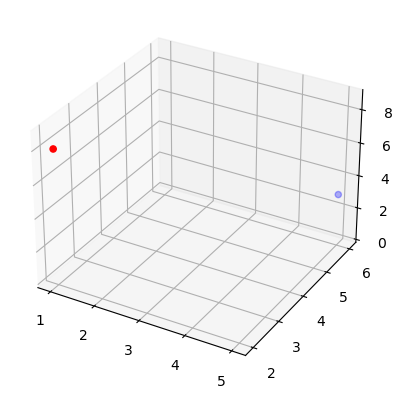

In [4]:
import matplotlib.pyplot as plt 
subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords, color = ['red', 'blue'])
subplot3d.set_zlim3d([0, 9])

plt.savefig('dos_puntos_3d.jpg')
plt.show()

Es un poco difícil visualizar exactamente dónde están estos dos puntos en el espacio, así que agreguemos líneas verticales. Crearemos una pequeña función de conveniencia para trazar una lista de vectores 3D con líneas verticales adjuntas:

## Trazo de dos vectores 3D con puntos grises de preyección sobre el plano xy

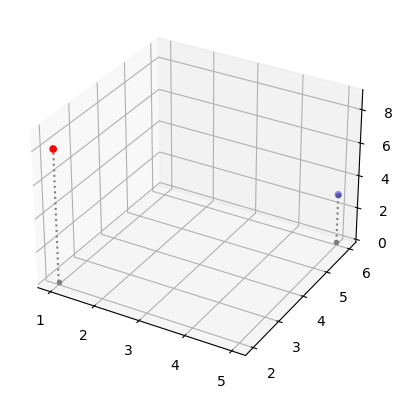

In [5]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))

plt.savefig('vectores_3d_con_proyeccion_sobre_xy.jpg')
plt.show()

## [Video de apoyo para el aprendizaje de la visualización con matplotlib de vectores con su proyección](https://www.youtube.com/watch?v=vc3XV_XXCNw)

## [Norma](https://github.com/ageron/handson-ml3/blob/main/math_linear_algebra.ipynb)

Modelo pedagógico de enseñanza: [Aula invertida](https://udeaeduco-my.sharepoint.com/:b:/g/personal/marco_canas_udea_edu_co/EelvUuuDvaVAmJUCFE-XNicB_MPrWZfrqbpx7USTUovKUQ?e=npa4Xa) 

### Objetivos de aprendizaje

1. conocer la definición de norma euclidiana de un vector
2. Determinar la norma de un vector por definición utilizando una función de usuario de python
3. Determinar la norma de un vector utlizando la función `norm()` del módulo `linalg` de Numpy. 
4. Representar un vector y su norma en un mismo plano cartesiano. 

## [Video de apoyo al aprendizaje del concepto de norma de un vector](https://www.youtube.com/watch?v=YNCc7JqS6cI)

La norma de un vector $\textbf{u}$, anotada $\left \Vert \textbf{u} \right \|$, es una medida de la longitud (también conocida como la magnitud) de $\textbf{u}$. 

Hay múltiples normas posibles, pero la más común (y la única que discutiremos aquí) es **la norma euclidiana**, que se define como:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

Esa es la raíz cuadrada de la suma de todos los cuadrados de los componentes de $\textbf{u}$. Podríamos implementar esto fácilmente en Python puro, recordando que $\sqrt x = x^{\frac{1}{2}}$

In [8]:
u = [2,5]
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "|| =")
vector_norm(u)

|| [2, 5] || =


5.385164807134504

Sin embargo, es mucho más eficiente usar la función `norm` de NumPy, disponible en el módulo `linalg` (**Lin**ear **Alg**ebra):

In [9]:
import numpy.linalg as LA

LA.norm(u)

5.385164807134504

Tracemos un pequeño diagrama para confirmar que la longitud del vector $\textbf{u}$ es de hecho $\approx5.4$:

In [16]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

#length includes head: la longitud incluye la cabeza

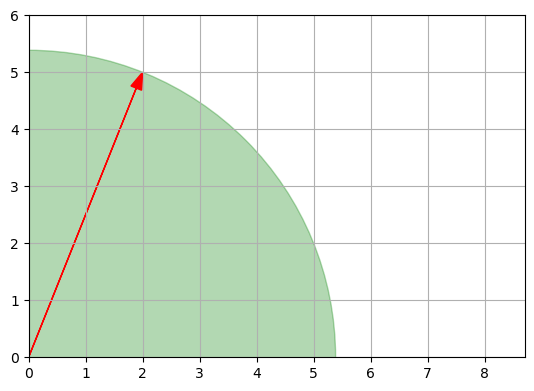

In [17]:
radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color="green", alpha = 0.3))
plot_vector2d(u, color="red")
plt.axis([0, 8.7, 0, 6])
plt.gca().set_aspect("equal")
plt.grid()
plt.savefig('representacion_geometrica_norma_vector.jpg')

plt.show()

## Tareas de fijación de conceptos y de adquisición de habilidades

1. crear hábito
2. de desarrollo de capacidades de comunicación científica: crear un vector de 3 y de 4 componjentes y calcular su norma con python puro y realizando un video de exposición de este procedimiento.  

## Tareas para realizar fuera de clase

* Memorización
* Observación 
* Síntesis

### Cuestionario

¿Cómo se calcula la norma de un vector utilizando la norma euclidiana?

## Evaluación (Posibles punto de quiz o parcial) 

## Suma
Se pueden sumar vectores del mismo tamaño. La suma se realiza *por elementos*:

Modelo pedagógico de enseñanza: [Aula invertida](https://udeaeduco-my.sharepoint.com/:b:/g/personal/marco_canas_udea_edu_co/EelvUuuDvaVAmJUCFE-XNicB_MPrWZfrqbpx7USTUovKUQ?e=npa4Xa) 

### [Video sobre la adición de vectores]()

In [ ]:
print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

Veamos cómo se ve gráficamente la suma de vectores:

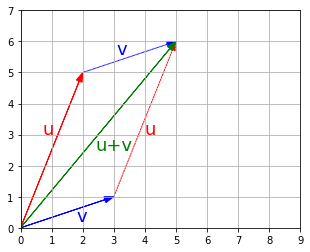

In [ ]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.gca().set_aspect("equal")
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

La suma de vectores es **conmutativa**, lo que significa que $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$. Puedes verlo en la imagen anterior: siguiendo $\textbf{u}$ *luego* $\textbf{v}$ lleva al mismo punto que siguiendo $\textbf{v}$ *luego* $\textbf{u}$ ps

Vector addition is also **associative**, meaning that $\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{w}$.

# Traslación geométrica

Si tiene una forma definida por una cantidad de puntos (vectores) y agrega un vector $\textbf{v}$ a todos estos puntos, entonces toda la forma se desplaza $\textbf{v}$. Esto se llama [traducción geométrica] (https://en.wikipedia.org/wiki/Translation_%28geometry%29):

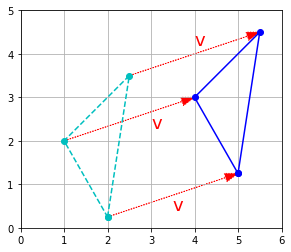

In [ ]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(v, t1, color="r", linestyle=":")
plot_vector2d(v, t2, color="r", linestyle=":")
plot_vector2d(v, t3, color="r", linestyle=":")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.text(4, 4.2, "v", color="r", fontsize=18)
plt.text(3, 2.3, "v", color="r", fontsize=18)
plt.text(3.5, 0.4, "v", color="r", fontsize=18)

plt.axis([0, 6, 0, 5])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

Finalmente, restar un vector es como sumar el vector opuesto.

## Multiplication by a scalar

Los vectores se pueden multiplicar por escalares. Todos los elementos del vector se multiplican por ese número, por ejemplo:

In [ ]:
print("1.5 *", u, "=")

1.5 * u

1.5 * [2 5] =


array([3. , 7.5])

Gráficamente, la multiplicación escalar da como resultado cambiar la escala de una figura, de ahí el nombre *escalar*. La distancia desde el origen (el punto en coordenadas iguales a cero) también se multiplica por el escalar. Por ejemplo, ampliemos la escala por un factor de `k = 2.5`:

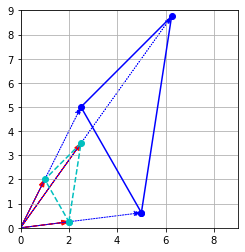

In [ ]:
k = 2.5
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1, color="r")
plot_vector2d(t2, color="r")
plot_vector2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector2d(k * t1, color="b", linestyle=":")
plot_vector2d(k * t2, color="b", linestyle=":")
plot_vector2d(k * t3, color="b", linestyle=":")

plt.axis([0, 9, 0, 9])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

As you might guess, dividing a vector by a scalar is equivalent to multiplying by its multiplicative inverse (reciprocal):

$\dfrac{\textbf{u}}{\lambda} = \dfrac{1}{\lambda} \times \textbf{u}$

Scalar multiplication is **commutative**: $\lambda \times \textbf{u} = \textbf{u} \times \lambda$.

It is also **associative**: $\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$.

Finally, it is **distributive** over addition of vectors: $\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{v}$.

## Zero, unit and normalized vectors
* A **zero-vector** is a vector full of 0s.
* A **unit vector** is a vector with a norm equal to 1.
* The **normalized vector** of a non-null vector $\textbf{v}$, noted $\hat{\textbf{v}}$, is the unit vector that points in the same direction as $\textbf{v}$. It is equal to: $\hat{\textbf{v}} = \dfrac{\textbf{v}}{\left \Vert \textbf{v} \right \|}$



## Vectores cero, unitarios y normalizados
* Un **vector cero** es un vector lleno de ceros.
* Un **vector unitario** es un vector con una norma igual a 1.
* El **vector normalizado** de un vector no nulo $\textbf{v}$, anotado $\hat{\textbf{v}}$, es el vector unitario que apunta en la misma dirección que $\textbf{ v}$. Es igual a: $\hat{\textbf{v}} = \dfrac{\textbf{v}}{\left \Vert \textbf{v} \right \|}$

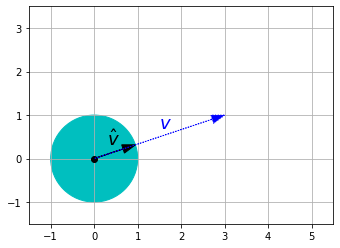

In [ ]:
plt.gca().add_artist(plt.Circle((0, 0), 1, color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k", zorder=10)
plot_vector2d(v, color="b", linestyle=":", zorder=15)
plt.text(0.3, 0.3, r"$\hat{v}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$v$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

## Dot product

Matrix $V$ is called a **rotation matrix**.

## Tareas para fuera de clase

* Observar cómo cambia el área de una circunferencia a medida que el radio cambio. 
* memorizar el algoritmo para crear vectores 2D y 3D y representarlos graficamente como puntos y como flechas. 
* describir en tiempo corto la denición de norma de una vector y algunas formas de hallar la norma de un vector con python. 

## Tareas  en clase

* Accede, repetida y libremente, a los contenidos y actividades facilitados por el docente.
* Realiza las actividades propuestas

* Cree dos vectores no unitarios y normalicelos con python y represente a los vectores y a sus vectores unitarioas asociados con matplotlib. 

## Evaluación (Puntos posibles de parcial o quiz)  



### [Evaluación a la clase del docente Marco Cañas](https://forms.office.com/Pages/ResponsePage.aspx?id=IefhmYRxjkmK_7KtTlPBwkanXIs1i1FEujpsZgO6dXpUREJPV1kxUk1JV1ozTFJIQVNIQjY5WEY3US4u)

# Proyecto propuesto a los estudiantes que estimule el aprendizaje del álgebra lineal con enfoque a ciencia de datos